In [320]:
import pandas as pd
import os

df = pd.read_csv('C:/Cand.merc.BI/2. Semester/Data Science Project/Project/BilbasenProject/data/data_analysis/clean_data_ID_4.csv')

In [321]:
df

,Dealer/private,Price_kr,Model_year,First_registration,Mileage_km,Range_km,BatteryCapacity_kWh,Horsepower,Acceleration_sec,Color,AWD/RWD
0,True,299800,2021,8/2021,2000,490,77.0,204,8.5,Koksmetal,False
1,True,329800,2023,10/2022,5000,514,77.0,204,8.5,Blåmetal,False
2,True,289900,2023,7/2023,7000,531,77.0,174,10.4,Hvidmetal,False
3,True,419800,2023,3/2023,50,479,77.0,299,6.2,Hvidmetal,True
4,True,359900,2023,6/2023,37,496,77.0,299,6.2,Sølvmetal,True
...,...,...,...,...,...,...,...,...,...,...,...
481,False,339000,2022,11/2022,15000,514,77.0,204,8.5,Sort,False
482,False,350000,2023,2/2023,8000,496,76.6,299,6.2,Hvid,True
483,False,295000,2022,12/2022,25000,514,76.6,204,8.5,Sølvmetal,False
484,False,299500,2021,4/2021,42000,490,76.6,204,8.5,Gråmetal,False


First_registration and Color needs modification

In [322]:
df['Color'].value_counts()

Color
Hvidmetal        84
Hvid             78
Grå              68
Blåmetal         57
Gråmetal         42
Koksmetal        37
Sortmetal        32
Sølvmetal        30
Rødmetal         12
Sort             12
Blå               8
Guldmetal         7
Lysblåmetal       4
Mørkgrå           3
Mørkblåmetal      3
Gulmetal          2
Koks              2
Rød               2
Perlemorshvid     1
Metal             1
Beige             1
Name: count, dtype: int64

Lump colors

In [323]:
# Replace variations of colors
df['Color'] = df['Color'].replace(r'\b(Hvidmetal|Perlemorshvid)\b', 'Hvid', regex=True)
df['Color'] = df['Color'].replace(r'\b(Gråmetal|Koksmetal|Mørkgrå|Koks|Metal|Beige)\b', 'Grå', regex=True)
df['Color'] = df['Color'].replace(r'\b(Blåmetal|Lysblåmetal|Mørkblåmetal)\b', 'Blå', regex=True)
df['Color'] = df['Color'].replace(r'\b(Sortmetal)\b', 'Sort', regex=True)
df['Color'] = df['Color'].replace(r'\b(Rødmetal)\b', 'Rød', regex=True)
df['Color'] = df['Color'].replace(r'\b(Gulmetal|Guldmetal)\b', 'Gul_guld', regex=True)
df['Color'] = df['Color'].replace(r'\b(Sølvmetal)\b', 'Sølv', regex=True)

Translate colors

In [324]:
df['Color'] = df['Color'].replace(r'\b(Hvid)\b', 'White', regex=True)
df['Color'] = df['Color'].replace(r'\b(Grå)\b', 'Grey', regex=True)
df['Color'] = df['Color'].replace(r'\b(Blå)\b', 'Blue', regex=True)
df['Color'] = df['Color'].replace(r'\b(Sort)\b', 'Black', regex=True)
df['Color'] = df['Color'].replace(r'\b(Rød)\b', 'Red', regex=True)
df['Color'] = df['Color'].replace(r'\b(Gul_guld)\b', 'Yellow_gold', regex=True)
df['Color'] = df['Color'].replace(r'\b(Sølv)\b', 'Silver', regex=True)

Change dtype of color

In [325]:
df['Color'] = df['Color'].astype('category')

Adding age_in_months instead of First registration

In [326]:
df['First_registration'].value_counts()

First_registration
4/2021     46
6/2023     38
12/2020    26
8/2021     25
6/2021     24
12/2021    23
12/2022    21
10/2021    21
5/2021     20
3/2023     20
11/2021    17
4/2023     17
2/2023     16
3/2021     16
1/2022     15
11/2022    13
2/2022     13
7/2021     11
3/2022     11
10/2022    10
1/2021     10
9/2021     10
9/2022      9
5/2022      7
6/2022      6
8/2022      5
5/2023      5
7/2023      5
1/2023      5
2/2021      4
7/2022      4
2/2024      3
8/2023      2
12/2023     2
11/2023     2
4/2022      2
10/2023     1
10/2020     1
Name: count, dtype: int64

In [327]:
# Assuming df_v is already defined and contains the 'First_registration' column
# Convert 'First_registration' to datetime
df['First_registration'] = pd.to_datetime(df['First_registration'], format='%m/%Y')

# Define the reference date (May 2024)
reference_date = pd.Timestamp('2024-05-01')

# Calculate the difference in months
df['Age_in_months'] = (reference_date.year - df['First_registration'].dt.year) * 12 + (reference_date.month - df['First_registration'].dt.month)


Checking correct age

In [328]:
df['Age_in_months'].value_counts()

Age_in_months
37    46
11    38
41    26
33    25
35    24
29    23
17    21
31    21
36    20
14    20
30    17
13    17
15    16
38    16
28    15
18    13
27    13
34    11
26    11
19    10
40    10
32    10
20     9
24     7
23     6
21     5
12     5
10     5
16     5
39     4
22     4
3      3
9      2
5      2
6      2
25     2
7      1
43     1
Name: count, dtype: int64

Checking correct dtypes

In [329]:
df.dtypes

Dealer/private                   bool
Price_kr                        int64
Model_year                      int64
First_registration     datetime64[ns]
Mileage_km                      int64
Range_km                        int64
BatteryCapacity_kWh           float64
Horsepower                      int64
Acceleration_sec              float64
Color                        category
AWD/RWD                          bool
Age_in_months                   int32
dtype: object

In [330]:
df = df.drop(columns=['First_registration']) #Dropping old variable

Correlation matrix - Feature selection

In [331]:
df_numeric = df.drop(columns=['Color'])

In [332]:
import pandas as pd
import numpy as np

df_matrix = pd.DataFrame(df_numeric)
corr = df_matrix.corr()
corr.style.background_gradient(cmap='coolwarm')

,Dealer/private,Price_kr,Model_year,Mileage_km,Range_km,BatteryCapacity_kWh,Horsepower,Acceleration_sec,AWD/RWD,Age_in_months
Dealer/private,1.000000,0.000952,-0.010863,-0.049811,-0.023277,-0.021288,-0.048179,0.047633,-0.046802,0.035271
Price_kr,0.000952,1.000000,0.464762,-0.444402,0.474413,0.532933,0.707944,-0.683334,0.601753,-0.494813
Model_year,-0.010863,0.464762,1.000000,-0.504326,0.253632,0.091353,0.140855,-0.084560,0.168532,-0.932763
Mileage_km,-0.049811,-0.444402,-0.504326,1.000000,0.020293,0.093987,-0.077758,0.017791,-0.159231,0.523385
Range_km,-0.023277,0.474413,0.253632,0.020293,1.000000,0.942288,0.299431,-0.363558,-0.019096,-0.250482
BatteryCapacity_kWh,-0.021288,0.532933,0.091353,0.093987,0.942288,1.000000,0.483086,-0.532798,0.168477,-0.099805
Horsepower,-0.048179,0.707944,0.140855,-0.077758,0.299431,0.483086,1.000000,-0.964745,0.927725,-0.186640
Acceleration_sec,0.047633,-0.683334,-0.084560,0.017791,-0.363558,-0.532798,-0.964745,1.000000,-0.824365,0.117444
AWD/RWD,-0.046802,0.601753,0.168532,-0.159231,-0.019096,0.168477,0.927725,-0.824365,1.000000,-0.225763
Age_in_months,0.035271,-0.494813,-0.932763,0.523385,-0.250482,-0.099805,-0.186640,0.117444,-0.225763,1.000000


Variables with high correlation:
Model Year and Age in months = We keep age in months
Range and battery capacity = We keep Battery Capacity
AWD/RWD, acceleration and horsepower = We discard horse and keep the 2 other (to keep the lowest of the correlations)

In [333]:
df = df.drop(columns=['Model_year'])
df = df.drop(columns=['BatteryCapacity_kWh'])
df = df.drop(columns=['Horsepower'])

In [334]:
df

,Dealer/private,Price_kr,Mileage_km,Range_km,Acceleration_sec,Color,AWD/RWD,Age_in_months
0,True,299800,2000,490,8.5,Grey,False,33
1,True,329800,5000,514,8.5,Blue,False,19
2,True,289900,7000,531,10.4,White,False,10
3,True,419800,50,479,6.2,White,True,14
4,True,359900,37,496,6.2,Silver,True,11
...,...,...,...,...,...,...,...,...
481,False,339000,15000,514,8.5,Black,False,18
482,False,350000,8000,496,6.2,White,True,15
483,False,295000,25000,514,8.5,Silver,False,17
484,False,299500,42000,490,8.5,Grey,False,37


Summary statistics

In [335]:
df.describe().round(1)

,Price_kr,Mileage_km,Range_km,Acceleration_sec,Age_in_months
count,486.0,486.0,486.0,486.0,486.0
mean,302488.7,31039.6,486.3,8.4,26.4
std,45705.3,25821.0,54.2,1.2,10.2
min,199800.0,37.0,330.0,6.2,3.0
25%,269900.0,13000.0,490.0,8.5,17.0
50%,299900.0,25000.0,496.0,8.5,29.0
75%,329900.0,42000.0,517.0,8.5,36.0
max,469900.0,163000.0,531.0,10.9,43.0


In [336]:
df['Range_km'].value_counts()

Range_km
490    106
531     91
514     47
517     43
343     36
479     34
496     25
476     22
506     18
499     10
340      8
516      6
507      5
518      4
345      4
511      3
500      2
509      2
487      2
466      1
411      1
333      1
482      1
344      1
330      1
488      1
473      1
501      1
422      1
484      1
341      1
485      1
497      1
508      1
495      1
346      1
332      1
Name: count, dtype: int64

array([[<Axes: title={'center': 'Price_kr'}>,
        <Axes: title={'center': 'Mileage_km'}>],
       [<Axes: title={'center': 'Age_in_months'}>, <Axes: >]],
      dtype=object)

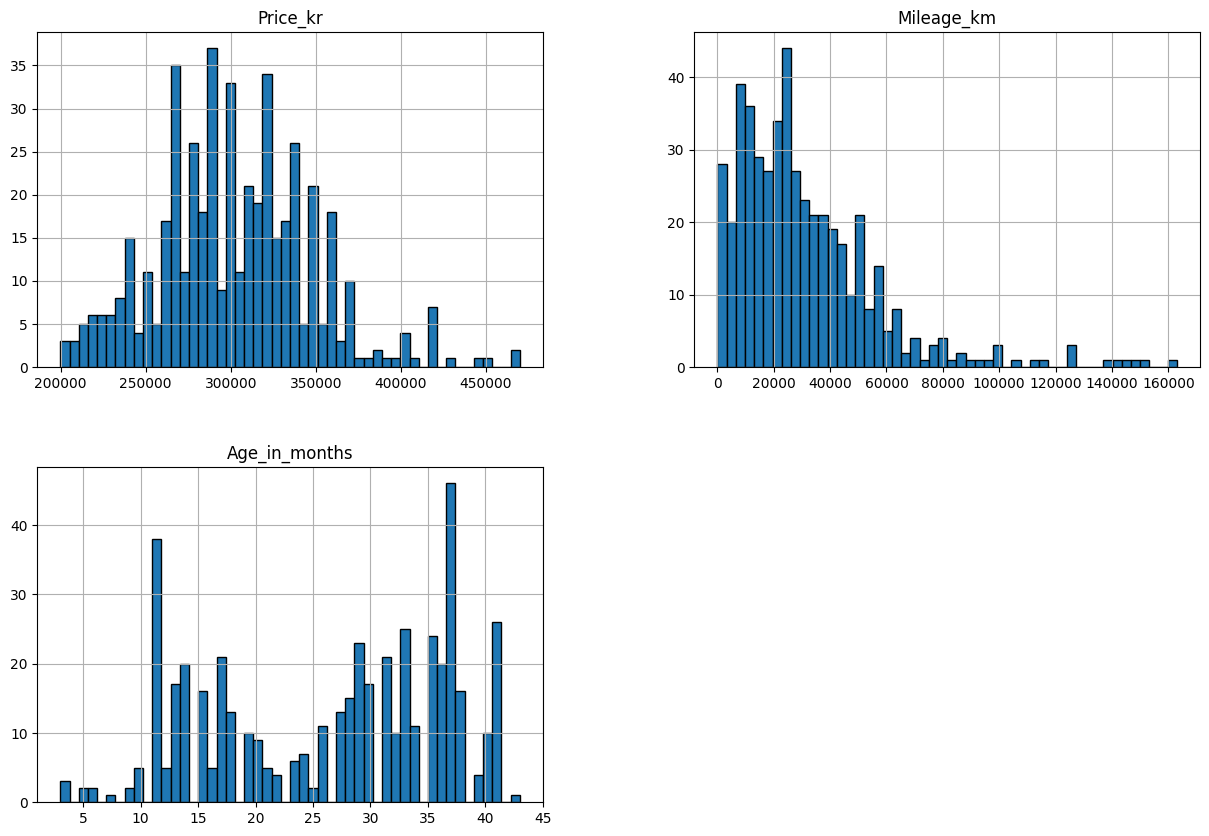

In [347]:
df.hist(bins=50, edgecolor='black', figsize=(15, 10))

Looking at the distribution of the variables, it looks like the acceleration times are generaylly split into 3 group. Same thing with range_km

In [338]:
df.describe(include=['category', 'bool'])

,Dealer/private,Color,AWD/RWD
count,486,486,486
unique,2,7,2
top,True,White,False
freq,472,163,398


Splitting the acceleration into categories

In [339]:
bins = [0, 8, 10, float('inf')]
labels = ['fast', 'medium', 'slow']
# Create a new categorical variable based on the 'Acceleration_sec' column
df['Acceleration_category'] = pd.cut(df['Acceleration_sec'], bins=bins, labels=labels, right=False)
df['Acceleration_category'] = pd.Categorical(df['Acceleration_category'], categories=['fast', 'medium', 'slow'], ordered=True)

Splitting the range into categories

In [340]:
bins = [0, 480, 525, float('inf')]
labels = ['short', 'medium', 'long']
# Create a new categorical variable based on the 'Acceleration_sec' column
df['Range_category'] = pd.cut(df['Range_km'], bins=bins, labels=labels, right=False)
df['Range_category'] = pd.Categorical(df['Range_category'], categories=['short', 'medium', 'long'], ordered=True)

<Axes: xlabel='Range_category'>

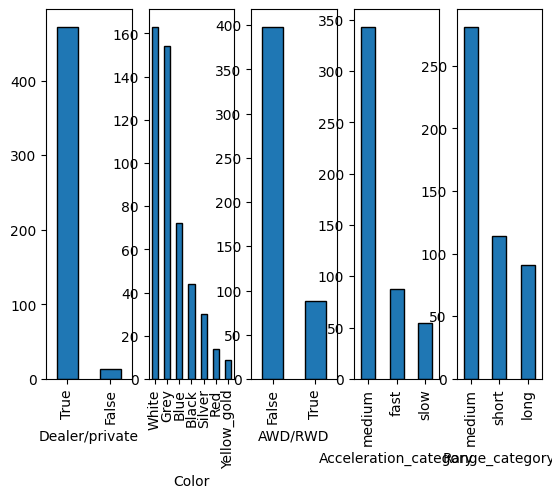

In [346]:
import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5)
df['Dealer/private'].value_counts().plot(kind='bar', ax=axes[0], edgecolor='black')
df['Color'].value_counts().plot(kind='bar', ax=axes[1], edgecolor='black')
df['AWD/RWD'].value_counts().plot(kind='bar', ax=axes[2], edgecolor='black')
df['Acceleration_category'].value_counts().plot(kind='bar', ax=axes[3], edgecolor='black')
df['Range_category'].value_counts().plot(kind='bar', ax=axes[4], edgecolor='black')

Dropping 'old' acceleration and range

In [344]:
df = df.drop(columns=['Acceleration_sec'])
df = df.drop(columns=['Range_km'])

In [355]:
df

,Dealer/private,Price_kr,Mileage_km,Color,AWD/RWD,Age_in_months,Acceleration_category,Range_category
0,True,299800,2000,Grey,False,33,medium,medium
1,True,329800,5000,Blue,False,19,medium,medium
2,True,289900,7000,White,False,10,slow,long
3,True,419800,50,White,True,14,fast,short
4,True,359900,37,Silver,True,11,fast,medium
...,...,...,...,...,...,...,...,...
481,False,339000,15000,Black,False,18,medium,medium
482,False,350000,8000,White,True,15,fast,medium
483,False,295000,25000,Silver,False,17,medium,medium
484,False,299500,42000,Grey,False,37,medium,medium


In [356]:
df.to_csv('C:/Cand.merc.BI/2. Semester/Data Science Project/Project/BilbasenProject/data/data_analysis/engineered_data_ID_4_pre_split.csv', index=False)